In [6]:
import pandas as p

data = p.read_csv('students.csv',header='infer')
data

,status,Gender,Age,GPA
0,freshman,Male,18,3.70
1,freshman,Male,20,3.30
2,freshman,Female,19,2.50
3,freshman,Female,17,3.70
4,freshman,Female,18,4.00
5,freshman,Female,19,3.60
6,sophomore,Male,19,2.50
7,sophomore,Male,19,3.25
8,sophomore,Male,19,4.00
9,sophomore,Male,21,2.33


# Data Summarization

In [7]:
from pandas import Series

data.GPA.to_frame()

,GPA
0,3.70
1,3.30
2,2.50
3,3.70
4,4.00
5,3.60
6,2.50
7,3.25
8,4.00
9,2.33


In [8]:
print "Average GPA: ", data.GPA.mean()
print "Std deviation of GPA: ", data.GPA.std()
print "Quantiles of GPA:\n", data.GPA.quantile([.25,.5,.75])

SyntaxError: invalid syntax (<ipython-input-8-f09d89f058c2>, line 1)

In [4]:
data.status.to_frame()

,status
0,freshman
1,freshman
2,freshman
3,freshman
4,freshman
5,freshman
6,sophomore
7,sophomore
8,sophomore
9,sophomore


In [4]:
print "Frequency distribution of Status:\n", data.status.value_counts()

Frequency distribution of Status:
sophomore    6
freshman     6
junior       3
senior       2
Name: status, dtype: int64


In [7]:
import numpy as np

prob = data.status.value_counts()
prob = prob/sum(prob)
print "Entropy = ", -np.dot(prob.transpose(),np.log(prob)/np.log(2))

Entropy =  1.86543710532


In [8]:
data[['Age','GPA']]

,Age,GPA
0,18,3.70
1,20,3.30
2,19,2.50
3,17,3.70
4,18,4.00
5,19,3.60
6,19,2.50
7,19,3.25
8,19,4.00
9,21,2.33


In [9]:
data.cov()

,Age,GPA
Age,4.566176,0.034522
GPA,0.034522,0.283081


In [10]:
data.corr()

,Age,GPA
Age,1.000000,0.030364
GPA,0.030364,1.000000


In [12]:
data2 = data[['Age','GPA']]
#data2.loc[:,'GPA']=10*data2.GPA
data2.loc[:,'GPA'] = data2.multiply(10,'GPA')
data2

,Age,GPA
0,18,37.0
1,20,33.0
2,19,25.0
3,17,37.0
4,18,40.0
5,19,36.0
6,19,25.0
7,19,32.5
8,19,40.0
9,21,23.3


In [13]:
data2.cov()

,Age,GPA
Age,4.566176,0.345221
GPA,0.345221,28.308088


In [14]:
data2.corr()

,Age,GPA
Age,1.000000,0.030364
GPA,0.030364,1.000000


In [15]:
data2 = data[['Gender','status']]
data2

,Gender,status
0,Male,freshman
1,Male,freshman
2,Female,freshman
3,Female,freshman
4,Female,freshman
5,Female,freshman
6,Male,sophomore
7,Male,sophomore
8,Male,sophomore
9,Male,sophomore


In [47]:
from pandas import crosstab

freq = crosstab(data2.Gender,data2.status)
freq

status,freshman,junior,senior,sophomore
Gender,,,,
Female,4,2,1,2
Male,2,1,1,4


In [45]:
total = freq.sum().sum()
Pxy = freq/total
Pxy

status,freshman,junior,senior,sophomore
Gender,,,,
Female,0.235294,0.117647,0.058824,0.117647
Male,0.117647,0.058824,0.058824,0.235294


In [66]:
from pandas import DataFrame

Px = freq.sum(axis=1)/total
Px

Gender
Female    0.529412
Male      0.470588
dtype: float64

In [67]:
Px = DataFrame([Px,Px,Px,Px],index=Pxy.columns).T
Px

status,freshman,junior,senior,sophomore
Gender,,,,
Female,0.529412,0.529412,0.529412,0.529412
Male,0.470588,0.470588,0.470588,0.470588


In [68]:
Py = freq.sum(axis=0)/total
Py = DataFrame([Py, Py],index=Pxy.index)
Py

status,freshman,junior,senior,sophomore
Gender,,,,
Female,0.352941,0.176471,0.117647,0.352941
Male,0.352941,0.176471,0.117647,0.352941


In [64]:
import numpy as np

temp = Pxy/Px
temp = temp/Py
temp = Pxy*np.log(temp)/np.log(2)
print "Mutual Information = ", temp.sum().sum()

Mutual Information =  0.0695944574975


# Data Visualization

In [2]:
data

,status,Gender,Age,GPA
0,freshman,Male,18,3.70
1,freshman,Male,20,3.30
2,freshman,Female,19,2.50
3,freshman,Female,17,3.70
4,freshman,Female,18,4.00
5,freshman,Female,19,3.60
6,sophomore,Male,19,2.50
7,sophomore,Male,19,3.25
8,sophomore,Male,19,4.00
9,sophomore,Male,21,2.33


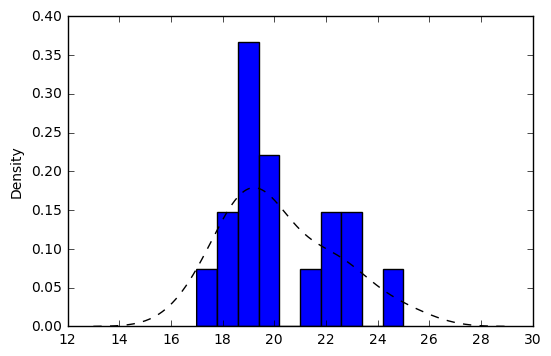

In [5]:
%matplotlib inline
data['Age'].hist(normed=True)
data['Age'].plot(kind='kde',style='k--')

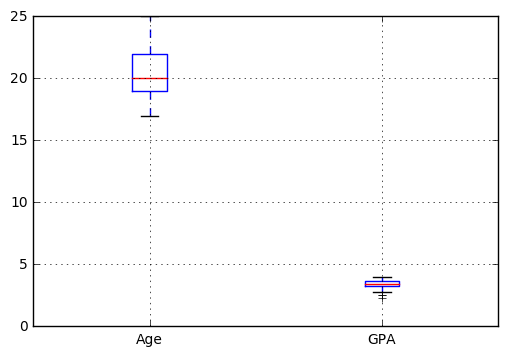

In [6]:
data.boxplot()

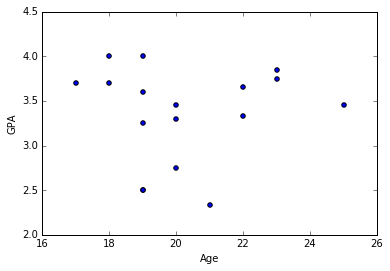

In [6]:
data.plot.scatter(x='Age',y='GPA')

In [3]:
data = p.read_csv('diabetes.csv',header='infer')
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


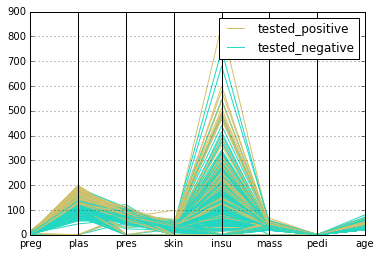

In [23]:
from pandas.tools.plotting import parallel_coordinates
%matplotlib inline

parallel_coordinates(data, 'class')
